### Imports

In [264]:
from sklearn import preprocessing

from dataset import *
from base_model import *
from neural_net import *
from sampled_net import *
from visualisator import *
from logic import *
import dataset
import base_model
import neural_net
import sampled_net
import visualisator
import logic

import importlib
importlib.reload(dataset)
importlib.reload(base_model)
importlib.reload(neural_net)
importlib.reload(sampled_net)
importlib.reload(visualisator)
importlib.reload(logic)



<module 'logic' from 'c:\\Users\\daydo\\OneDrive\\Dokumente\\banew\\logic.py'>

### Dataset creation

In [265]:
xd = 4  # Input space dimensions
yd = 4  # Output dimension
num_samples = 1000  # Number of data points
epochs = 100  # Number of training epochs
l = [200]  # Number of neurons in each layer


dataset = Dataset()
dataset.create_dataset_Barron(xd, num_samples)
dataset.scale(preprocessing.MinMaxScaler())
dataset.split_train_test(0.2)

### Neural Network training with Adam

In [266]:
model_nn = NeuralNet()
model_nn.fit(dataset.X_train, dataset.y_train, l, validation_split=0.2, epochs=epochs)


### Sampled Netwrok training with ridge, and losses comparaison

In [267]:
model_sampled = SampledNet()
alpha, radius = model_sampled.fit(dataset.X_train, dataset.y_train, model_nn, layer2="ridge", radius=-1, alpha=-1)

y_nn = model_nn.predict(dataset.X_test)
y_sampled = model_sampled.predict(dataset.X_test)

print(f"loss y_nn and y_test      \t{sklearn.metrics.mean_squared_error(y_nn, dataset.y_test)}")
print(f"loss y_sampled and y_test \t{sklearn.metrics.mean_squared_error(y_sampled, dataset.y_test)}")



radius: 0.000


100%|██████████| 200/200 [00:00<00:00, 2073.27it/s]


alpha 	loss
0.0001 	1.770e-02
0.001 	1.036e-02
0.01 	1.069e-02
0.1 	1.091e-02
1 	1.093e-02
10 	1.088e-02
100 	1.099e-02

radius: 0.194


100%|██████████| 200/200 [00:00<00:00, 2502.86it/s]

alpha 	loss
0.0001 	1.332e-02
0.001 	1.102e-02
0.01 	9.264e-03
0.1 	9.965e-03
1 	1.064e-02


10 	1.075e-02
100 	1.085e-02

radius: 0.388


100%|██████████| 200/200 [00:00<00:00, 359.40it/s]


alpha 	loss
0.0001 	7.342e-03
0.001 	5.643e-03
0.01 	4.577e-03
0.1 	4.494e-03
1 	6.621e-03
10 	8.716e-03
100 	9.410e-03

radius: 0.583


100%|██████████| 200/200 [00:01<00:00, 163.26it/s]


alpha 	loss
0.0001 	2.491e-03
0.001 	2.082e-03
0.01 	1.921e-03
0.1 	1.993e-03
1 	2.846e-03
10 	5.940e-03
100 	7.521e-03

radius: 0.777


100%|██████████| 200/200 [00:03<00:00, 64.14it/s]


alpha 	loss
0.0001 	1.335e-03
0.001 	1.272e-03
0.01 	1.177e-03
0.1 	1.230e-03
1 	1.846e-03
10 	4.598e-03
100 	7.778e-03

radius: 0.971


100%|██████████| 200/200 [00:06<00:00, 31.14it/s]


alpha 	loss
0.0001 	1.024e-03
0.001 	1.044e-03
0.01 	1.073e-03
0.1 	1.250e-03
1 	1.891e-03
10 	4.652e-03
100 	8.033e-03

radius: 1.165


100%|██████████| 200/200 [00:09<00:00, 20.05it/s]


alpha 	loss
0.0001 	1.105e-03
0.001 	1.106e-03
0.01 	1.140e-03
0.1 	1.300e-03
1 	1.946e-03
10 	4.485e-03
100 	7.646e-03

radius: 1.359


100%|██████████| 200/200 [00:12<00:00, 16.25it/s]


alpha 	loss
0.0001 	1.087e-03
0.001 	1.091e-03
0.01 	1.120e-03
0.1 	1.265e-03
1 	1.909e-03
10 	4.454e-03
100 	7.641e-03

radius: 1.554


100%|██████████| 200/200 [00:13<00:00, 15.13it/s]


alpha 	loss
0.0001 	1.085e-03
0.001 	1.089e-03
0.01 	1.122e-03
0.1 	1.277e-03
1 	1.877e-03
10 	4.428e-03
100 	7.691e-03

radius: 1.748


100%|██████████| 200/200 [00:13<00:00, 15.35it/s]


alpha 	loss
0.0001 	1.085e-03
0.001 	1.089e-03
0.01 	1.122e-03
0.1 	1.277e-03
1 	1.877e-03
10 	4.428e-03
100 	7.691e-03
loss y_nn and y_test      	0.005788073703646836
loss y_sampled and y_test 	0.0011649297458569891


### Plot the weights' angles differences, and prediction vs actual visualization

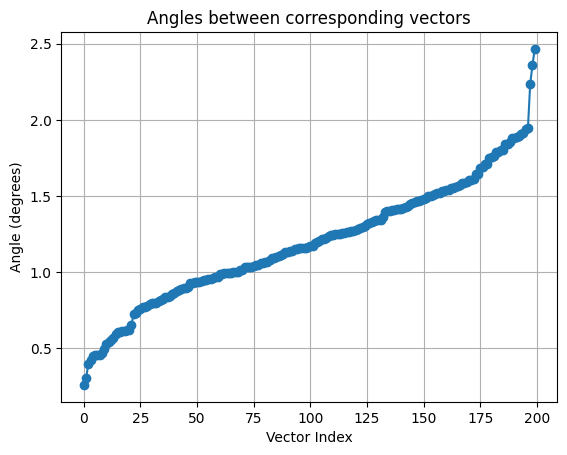

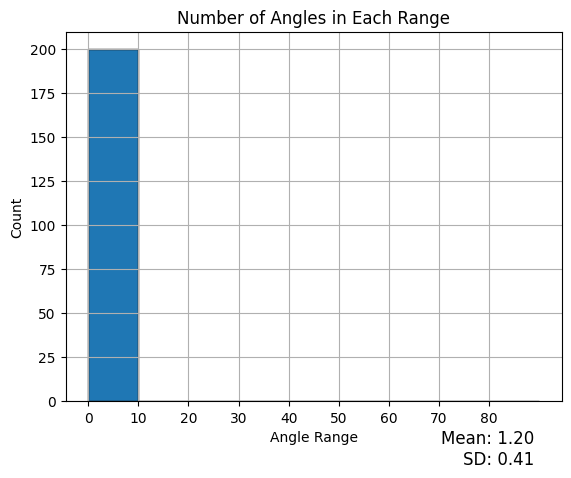

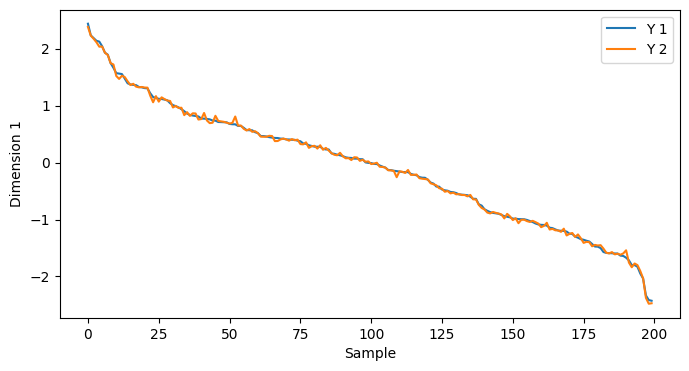

In [268]:
plot_vector_differences(np.transpose(model_nn.weights[0]), np.transpose(model_sampled.weights[0]))
visualize_data(dataset.y_test, y_sampled)


### Calculate loss for model trained on alpha and radius combinations.

In [269]:
mses = loss_f_alpha_radius_mse(dataset, model_nn)
write_to_file("loss_f_alpha_radius_mse.json", mses)

radius: 0.000


100%|██████████| 200/200 [00:00<00:00, 3572.72it/s]


radius: 0.194


100%|██████████| 200/200 [00:00<00:00, 2262.95it/s]


radius: 0.388


100%|██████████| 200/200 [00:00<00:00, 416.34it/s]


radius: 0.583


100%|██████████| 200/200 [00:01<00:00, 118.38it/s]


radius: 0.777


100%|██████████| 200/200 [00:04<00:00, 45.58it/s]


radius: 0.971


100%|██████████| 200/200 [00:08<00:00, 23.18it/s]


radius: 1.165


100%|██████████| 200/200 [00:13<00:00, 14.48it/s]


radius: 1.359


100%|██████████| 200/200 [00:16<00:00, 11.98it/s]


radius: 1.554


100%|██████████| 200/200 [00:17<00:00, 11.32it/s]


radius: 1.748


100%|██████████| 200/200 [00:17<00:00, 11.31it/s]


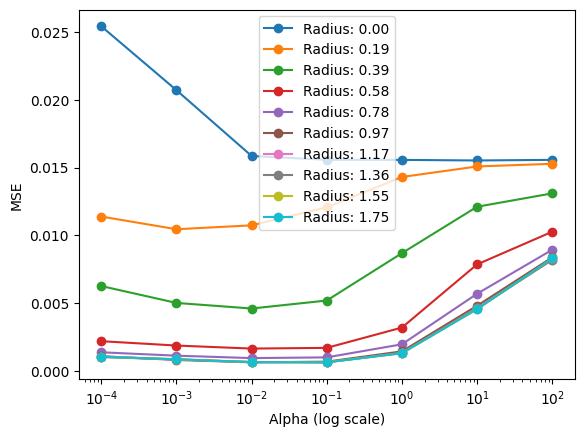

In [270]:
write_to_file("loss_f_alpha_radius_mse.json", mses)
plot_loss_f_alpha_radius_mse(mses)

### dataset creation and neural networks training with different numbre of samples

In [ ]:
nums_samples = [100, 200, 400, 800, 1600, 3200, 6400]
xd = 4
layers = [200]
datasets = []
models_nn = []
for num_samples in nums_samples:
    model_nn = NeuralNet()
    dataset = Dataset().create_dataset_Barron(xd, num_samples)
    dataset.scale(preprocessing.MinMaxScaler())
    dataset.split_train_test(0.2)
    model_nn.fit(dataset.X_train, dataset.y_train, layers)
    datasets.append(dataset)
    models_nn.append(model_nn)


In [ ]:
# Attention, takes 30+ minutes
losses_num_samples = mse_f_num_samples(datasets, models_nn)
write_to_file("loss f num samples.json", losses_num_samples)

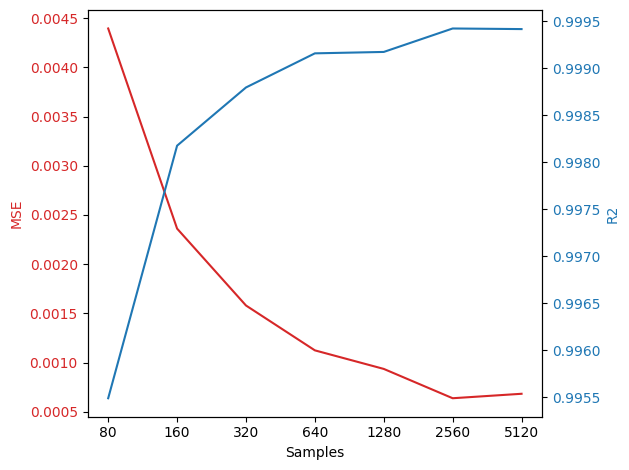

In [271]:
plot_loss_f_num_samples(losses_num_samples)
